   Major League Baseball has been America’s sports pastime for over 100 years and was first founded in 1876 for the National League and 1901 for the American League (source: Wikipedia).  Today, there are 15 teams in each league.  In the year 2000, the two leagues merged into what is now known as Major League Baseball (MLB).  Since the very beginning, statistics in baseball have played a major role in the game.  In today’s baseball, advanced metrics are being used by every major league team in order to gain advantage over their competition.  MLB organizations employ data science teams to collect this information for executives, general managers and coaches.  With today's big contracts to top performing players in MLB, it is important to make sure good decisions are made.
   
   Baseball contracts involve intense negotiations and millions of dollars are at stake.  Recently, the St. Louis Cardinals signed Paul Goldschmidt, agreeing to a five-year, $130 million contract.  Paul Goldschmidt is 32 years old.   Age plays a big role in a baseball players performance.  At some point as players get older, their performance on the field inevitably starts to decline.  I am an avid Cardinals fan, and I have wondered whether the Paul Goldschmidt deal was good for the St. Louis Cardinals.  The Cardinals are betting that he will produce through the age of 37 years old. 
      
   The statistic OPS (on base plus slug) is widely considered one of the best evaluation tools for hitter performance (Source: MLB).  Although it is not perfect, it is an indicator of a hitters batting average and power.  There are other advanced metrics that could be used as well; OPS is what I am using for this project.  OPS performance can be classified below (Source: Wikipedia)
   
                     Excellent      .9000 and above
                     Very Good      .8334 to .8999
                     Above Average  .7667 to .8333
                     Average        .7000 to .7666
                     Below Average  .6334 to .6999
                     Poor           .5667 to .6333
                     Very Poor      .5666 and Lower
    
   
   My questions are:  Was the Paul Goldschmidt signing by the St. Louis Cardinals a good deal for the Cardinals? More generally, is there a way to determine if other future big contract signings are a good idea or not?  In addition, I have always wondered if the "steroid era" really gave hitters an advantage over other timeframes in baseball.  The steroid era is defined to be from the early 1990's to 2003.  In 2004, MLB put in place rigorous testing for steroids.  Although there has been quite a bit of analysis on this already, I wanted to find out for myself.
   
   Let's jump right in.  Fox Sports had an article of some of the longest and most lucrative contracts in baseball history. Below is a contract summary for each of the 21 high performance players.





The Average Dollar Value of Contract (in millions): 161



The Average Length of Contract in Years: 8.9



The Average Player Age at Contract Signing: 28



The Average Player Age at End of Contract: 37





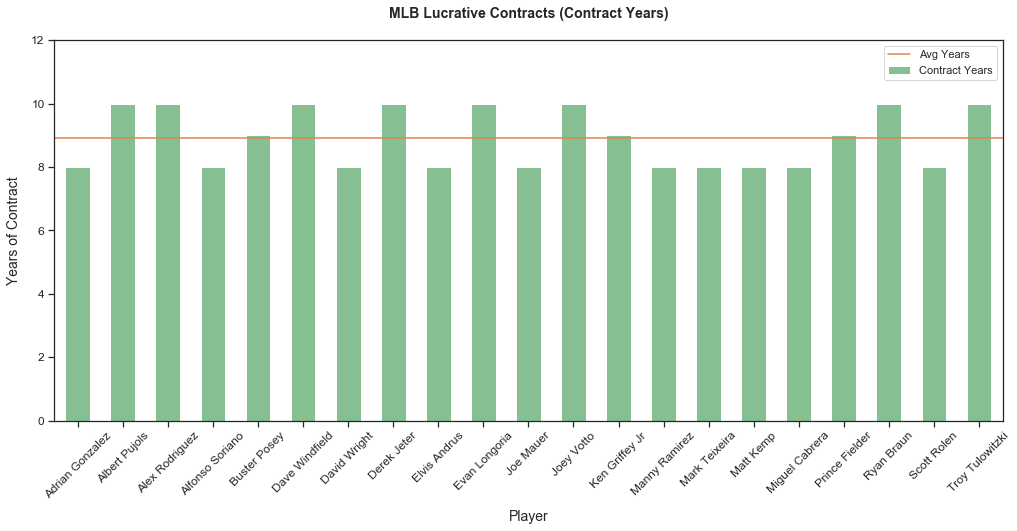

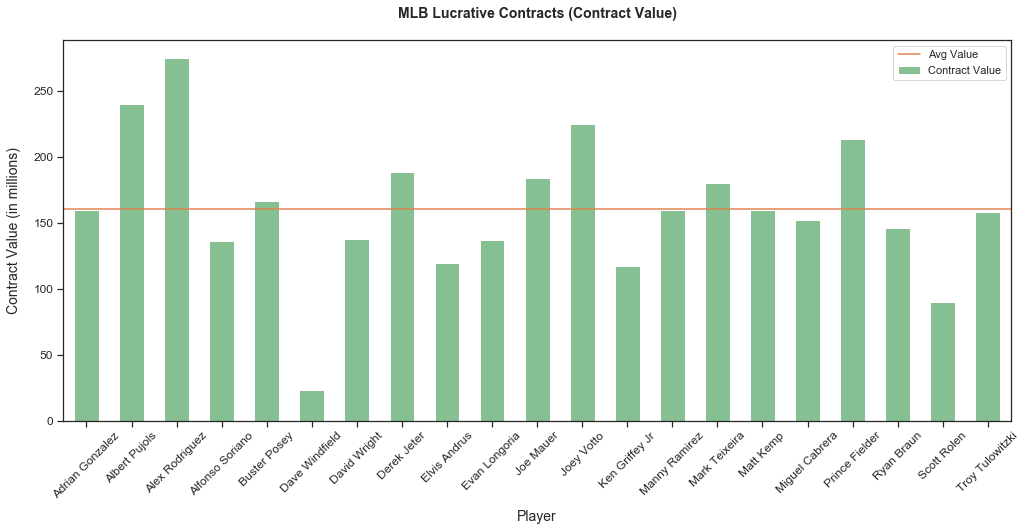

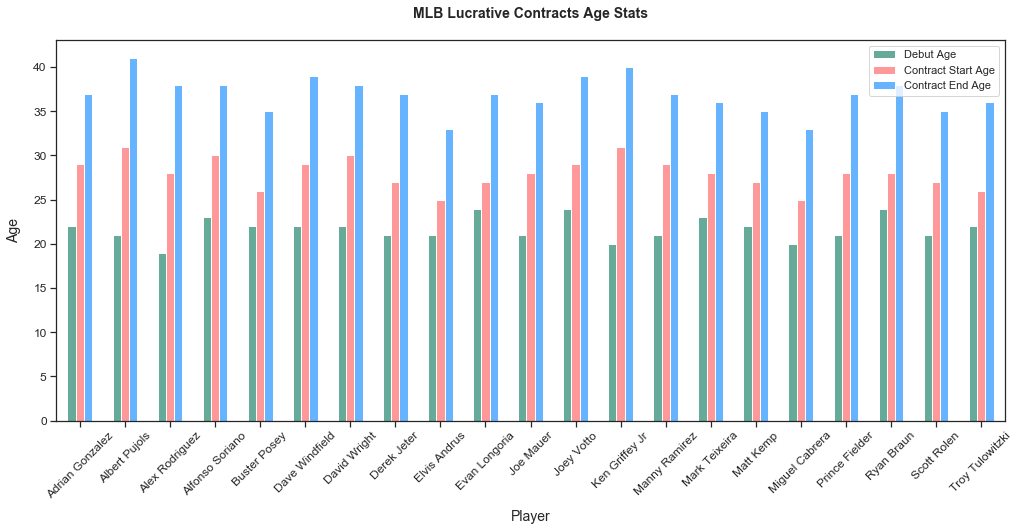

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
from pybaseball import batting_stats
import os.path
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
import pylab as plb
import seaborn as sns


sns.set()
sns.set_style('ticks')

MIN_AT_BATS = 0
START_YEAR = 1954
END_YEAR = 2018
FSHZ = 17
START_DATE = datetime.strptime(str(START_YEAR)+'-01-01','%Y-%m-%d')
END_DATE = datetime.strptime(str(END_YEAR)+'-12-31','%Y-%m-%d')
 

# set path for reading Lahman baseball statistics
path = 'C:\\Users\\User\\Documents\\PAUL\\Springboard\\core\\'
bigcontractsfile = 'BigPlayerContractsMLB.csv'

# saves a excel file to disk from a dataframe
def save_stats_file(path, fn, df):
    stf = path + fn
    df.to_csv(stf, index=None, header=True)
    return True

#routine that calculates OPS, OBP and SLG and returns them to calling routine.
def calc_ops(df):    
    df['1B'] = df['H'] - ( df['2B'] + df['3B'] + df['HR'] )  
    df['TB'] =  df['1B'] + (df['2B'] * 2) + (df['3B'] * 3) + (df['HR'] * 4)                             
    df['SLG'] = df['TB'] / df['AB']
    df['OBP'] = ( df['H'] + df['BB'] + df['HBP'] ) / ( df['AB'] + df['BB'] + df['SF'] + df['HBP'] )                 
    df['OPS'] = df['OBP'] + df['SLG'] 
    df['AVG'] = df['H'] / df['AB']
    return  df

battingf = path + 'dfbatting_player_stats.csv'
dfbatting_player_stats = pd.read_csv(battingf,parse_dates=['debut','finalGame','birthdate'])

dfbatting_player_stats = dfbatting_player_stats[(dfbatting_player_stats['debut'] >= START_DATE) &
                                                (dfbatting_player_stats['finalGame'] <= END_DATE)]

# read in file of some of the bigger contracts in MLB from 1970's to current.
bigcontractsf = path + bigcontractsfile
dfbig = pd.read_csv(bigcontractsf)

#
####################################################################################################################
#
#  Big Contract Examples
#
####################################################################################################################
print('\n\n')
print('The Average Dollar Value of Contract (in millions): ' + str("%.f" % dfbig.ConDollars.mean()))
print('\n\n')
print('The Average Length of Contract in Years: ' + str("%.1f" % dfbig.ConNumYears.mean()))
print('\n\n')
print('The Average Player Age at Contract Signing: ' + str("%.f" % dfbig.ConAgeStart.mean()))
print('\n\n')
print('The Average Player Age at End of Contract: ' + str("%.f" % dfbig.ConAgeEnd.mean()))
print('\n\n')

#
# plot contracted years by player
#
dfplot = dfbig[['playername2','ConNumYears','ConDollars']].sort_values('playername2')
dfplot.columns = ['playername2','Contract Years','Contract Value']
ax = dfplot.plot(kind='bar',x='playername2',y='Contract Years', color='#86bf91',width=0.55,figsize=(FSHZ,7))
ax.set_title('MLB Lucrative Contracts (Contract Years)\n', weight='bold', size=14)
ax.set_xlabel("Player", labelpad=10, size=14)
ax.set_ylabel("Years of Contract", labelpad=10, size=14)
for tick in ax.get_xticklabels():
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontsize(12)
plt.yticks(np.arange(0,14,2))
plt.xticks(rotation=45)
plb.axhline(dfplot['Contract Years'].mean(),c='C1',label='Avg Years')
plt.legend()
plt.show()
print('\n\n')

#
# plot contracted dollars (in millions) by player
#
dfplot = dfbig[['playername2','ConNumYears','ConDollars']].sort_values('playername2')
dfplot.columns = ['playername2','Contract Years','Contract Value']
ax = dfplot.plot(kind='bar',x='playername2',y='Contract Value', color='#86bf91',width=0.55,figsize=(FSHZ,7))
ax.set_title('MLB Lucrative Contracts (Contract Value)\n', weight='bold', size=14)
ax.set_xlabel("Player", labelpad=10, size=14)
ax.set_ylabel("Contract Value (in millions)", labelpad=12, size=14)
for tick in ax.get_xticklabels():
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontsize(12)
plt.xticks(rotation=45)
plb.axhline(dfplot['Contract Value'].mean(),c='C1',label='Avg Value')
plt.legend()
plt.show()
print('\n\n')

#
# plot contract starting age, ending age and years in league after contract ends
#
dfplot = dfbig[['playername2','DebutAge','ConAgeStart','ConAgeEnd']].sort_values('playername2')
dfplot.columns = ['playername2','Debut Age','Contract Start Age','Contract End Age']
ax = dfplot.plot(kind='bar',x='playername2',y=['Debut Age','Contract Start Age','Contract End Age'], color=['#66aa99','#ff9999','#66b3ff'],width=0.55,figsize=(FSHZ,7))
ax.set_title('MLB Lucrative Contracts Age Stats\n', weight='bold', size=14)
ax.set_xlabel("Player", labelpad=10,size=14)
ax.set_ylabel("Age", labelpad=12, size=14)
for tick in ax.get_xticklabels():
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontsize(12)
plt.xticks(rotation=45)
plt.show()
print('\n\n')



The contracts were clearly good for the player but was it good for the baseball owners as well.  Next, I chart OPS by age for the 21 players collectively.  I was quite surprised with the results.

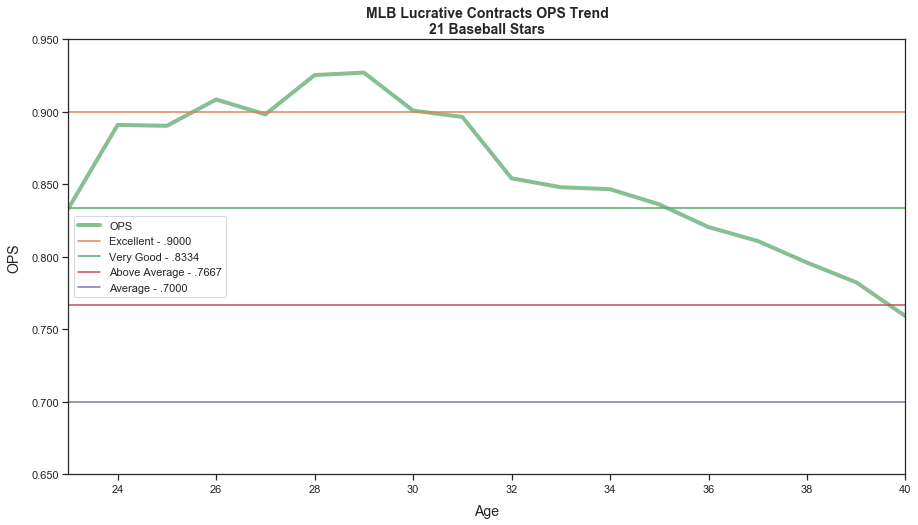

In [9]:
# plot the combined OPS of all 21 players
dfbig = pd.merge(dfbatting_player_stats,dfbig, on='playerID')
dfbig = dfbig[(dfbig['age'] > 22) & (dfbig['age'] <= 40)][['age','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfbig.groupby('age').sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='age',figsize=(15,8),linewidth=4,color='#86bf91')
ax.set_title('MLB Lucrative Contracts OPS Trend\n21 Baseball Stars',weight='bold', size=14)
ax.set_xlabel("Age", labelpad=10, size=14)
ax.set_ylabel("OPS", labelpad=10, size=14)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')
plt.yticks(np.arange(.650,1.000,.050))
plb.axhline(.9000,c='C1',label='Excellent - .9000', color='#ff9999')
plb.axhline(.8334,c='C2',label='Very Good - .8334', color='#66b3ff')
plb.axhline(.7667,c='C3',label='Above Average - .7667', color='#99ff99')
plb.axhline(.7000,c='C4',label='Average - .7000', color='#ffcc99')
#plb.axhline(.6334,c='C5',label='Below Average - .6334', color='#66aa99')
#plb.axhline(.5667,c='C6',label='Poor - .5667', color='#557799')
leg = plt.legend()
plt.show()

   The average age of the 21 players collectively is 28 years of age when the contract began.  The average age of the player at the end of the contract is 38 years of age.  What is interesting is right around the time the player signed the megadeal, they were at their peak performance well over .900 OPS which is considered excellent.  However, right after that, their OPS performance declined significantly over time.  

   So, I wondered if I looked at historical batting data from major league baseball games played, could I find a more general trend.  To find this out, statistical data was needed.

   Sean Layman has done a fantastic job at collecting raw data collected from 1871 to 2018 of major league baseball games.  All atomic data elements needed for the calculation of OPS (on base plus slug), OBP (on base percentage) and SLG (slugging) are available in this data. 
   
   After loading the Layman data, data wrangling and quality assessment was performed, and as a result of this assessment, yearly batting data was collect for all major league positon players from 1954 to 2018.  The main reason the data is limited to 1954 and forward is that Sacrafice Flies (SF) were not collected consistently prior to 1954 and was missing from the data.  So the raw data being used is from 1954 to 2018. 
   
   The following is information relating to the population of players and yearly statistics collected for each player.




Total Population of Players from 1954 to 2018: 5113


Total # of Observations (yearly player statistics) 1954 to 2018: 32487




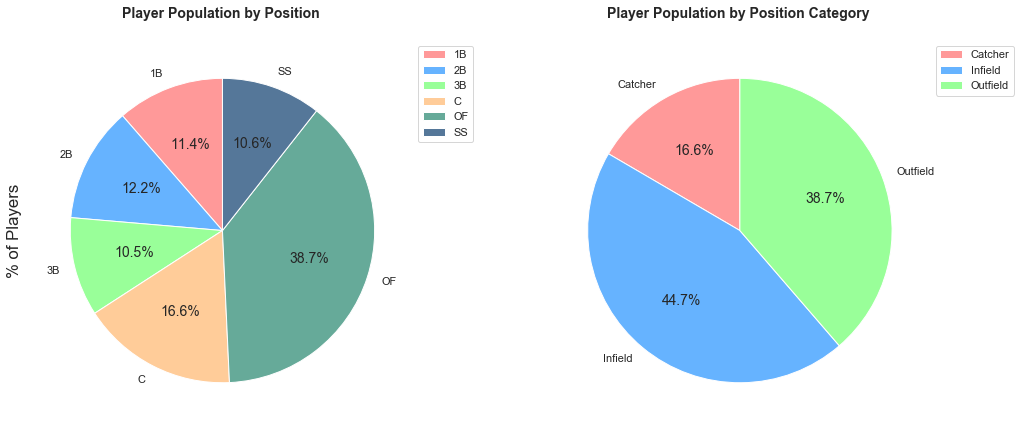

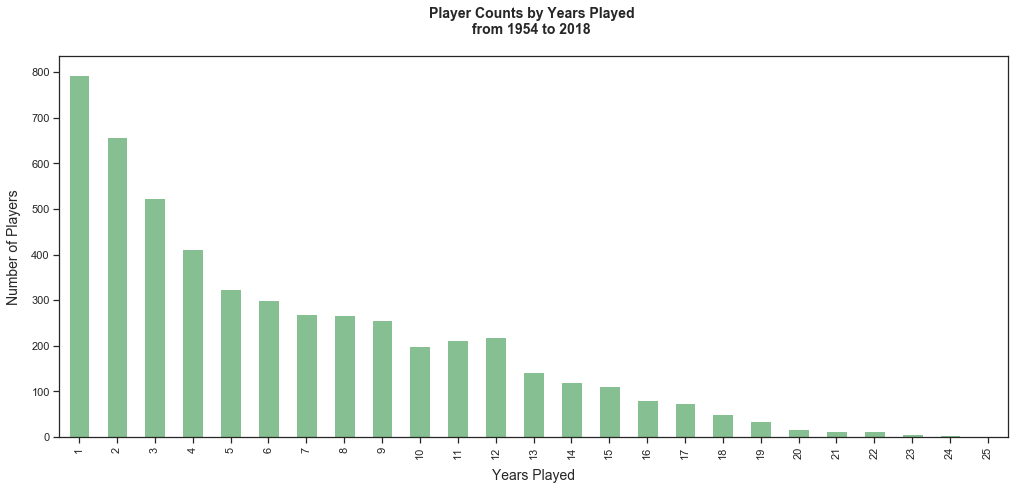

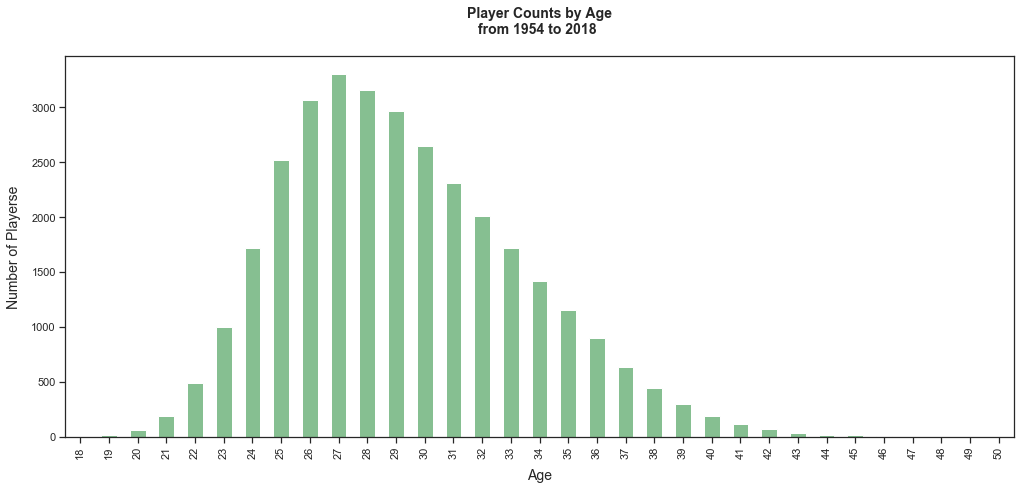

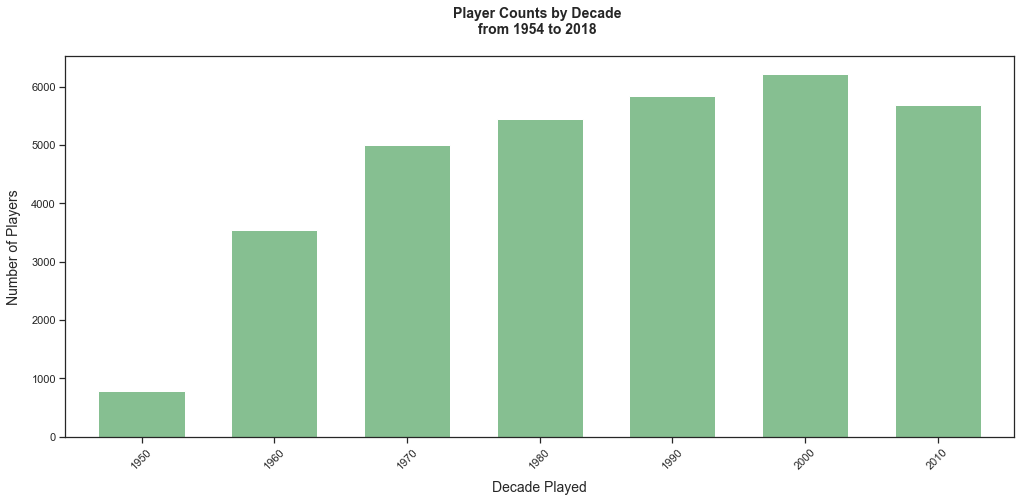

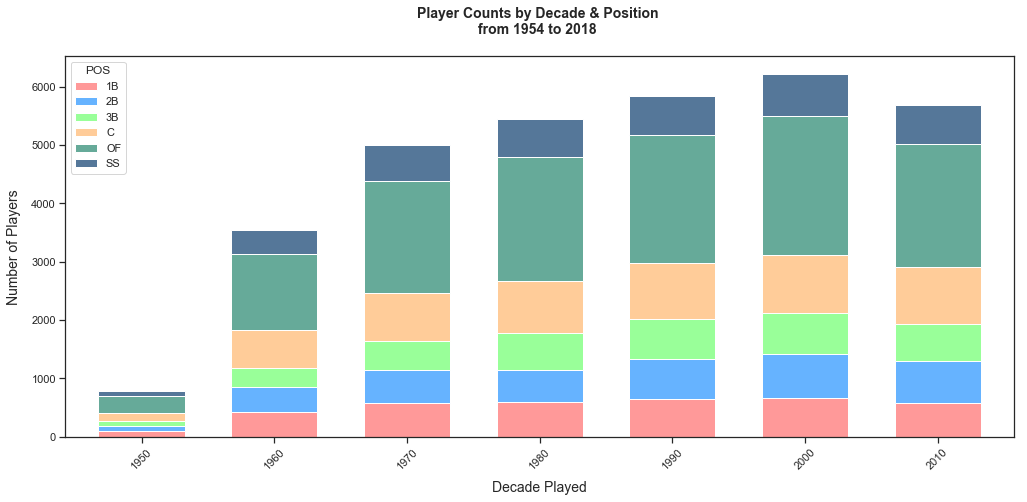

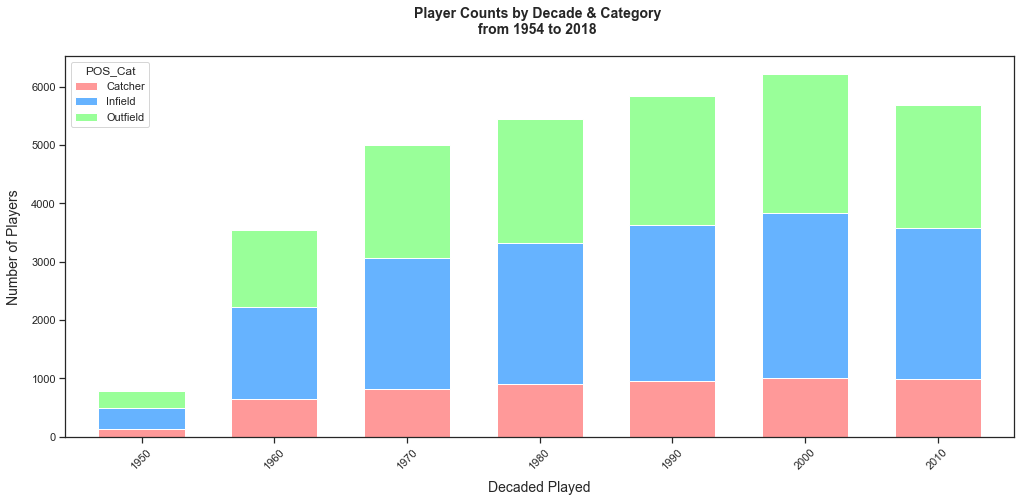

In [10]:
#
####################################################################################################################
#
#  Population and Observations Statistics.
#
####################################################################################################################
#

# calculate total population of players and total observations per year per player
dfbatting_ages = dfbatting_player_stats.groupby(['yearID','age']).count()['playerID']
dfbatting_ages = dfbatting_ages.reset_index()
dfbatting_ages.columns = ['yearID','age','agecount']
# add decade for better reporting
dfbatting_player_stats['decade'] = (dfbatting_player_stats['yearID'] // 10)*10
df = dfbatting_player_stats
# total number of players in population
dfbatting_playercnt = df.groupby(['yearID']).count()['age']
dfplayers_unique = df.playerID.unique()
print('\n\n')
print('Total Population of Players from 1954 to 2018: ' + str(len(dfplayers_unique)))
print('\n')
print('Total # of Observations (yearly player statistics) 1954 to 2018: ' + str( len(dfbatting_player_stats) ) )
print('\n')

#
####################################################################################################################
#
#  PIE charts for population by position and position category
#
####################################################################################################################
#
# set size information and layout for subplots
mpl.rcParams['font.size'] = 14.0
fig, axx = plt.subplots(nrows=1, ncols=2,)
fig.set_size_inches(FSHZ,7)
# players by position in population
dfplot1 = df[['playerID','POS']].drop_duplicates().groupby('POS').count()
dfplot1 = dfplot1.reset_index()
dfplot1.columns = ['Position','PositionCounts']
ax = dfplot1.plot(kind='pie',y='PositionCounts',labels=dfplot1['Position'],ax=axx[0],startangle=90,autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#66aa99','#557799'])
ax.set_title('Player Population by Position \n', weight='bold', size=14)
ax.set_ylabel("% of Players", labelpad=10, fontsize='large')
ax.legend(bbox_to_anchor=(1, 1))

# players by position category
dfplot2 = df[['playerID','POS_Cat']].drop_duplicates().groupby('POS_Cat').count()
dfplot2 = dfplot2.reset_index()
dfplot2.columns = ['PositionCat','PositionCatCounts']
ax2 = dfplot2.plot(kind='pie',y='PositionCatCounts',labels=dfplot2['PositionCat'],ax=axx[1],startangle=90,autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99'])
ax2.set_title('Player Population by Position Category \n', weight='bold', size=14)
ax2.set_ylabel(None, labelpad=10,  fontsize='large')
ax2.legend(bbox_to_anchor=(1, 1))
plt.show()
print('\n\n')

mpl.rcParams['font.size'] = 12.0

# bar chart showing player counts by years played
dfplot = df[['playerID','years_played']].drop_duplicates().groupby('years_played').count()
dfplot = dfplot.reset_index()
dfplot.columns = ['YearsPlayed','YearCounts']
ax = dfplot.plot(kind='bar',x='YearsPlayed',y='YearCounts',color='#86bf91',width=0.55,figsize=(FSHZ,7))
ax.set_title('Player Counts by Years Played \nfrom 1954 to 2018 \n',weight='bold',size=14)
ax.set_xlabel("Years Played", labelpad=10, size=14)
ax.set_ylabel("Number of Players", labelpad=10,size=14)
ax.get_legend().remove()
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
plt.show()
print('\n\n')

#
####################################################################################################################
#
#  Observation charts looking at all batter statistics per year by years played, age, by year
#
####################################################################################################################
#
# bar chart showing player counts by age
dfplot = df[['playerID','age']].groupby('age').count()
dfplot = dfplot.reset_index()
dfplot.columns = ['Age','Age Counts']
ax = dfplot.plot(kind='bar',x='Age',y='Age Counts', color='#86bf91',width=0.55,figsize=(FSHZ,7))
ax.set_title('Player Counts by Age\nfrom 1954 to 2018 \n',weight='bold',size=14)
ax.set_xlabel("Age", labelpad=10,size=14)
ax.set_ylabel("Number of Playerse", labelpad=10,size=14)
ax.get_legend().remove()
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
plt.show()
print('\n\n')

# bar chart showing player counts by year
dfplot = df[['decade','playerID']].groupby('decade').count()
dfplot = dfplot.reset_index()
dfplot.columns = ['Decade','Player Counts']
ax = dfplot.plot(kind='bar',x='Decade',y='Player Counts',figsize=(FSHZ,7),width=0.65,color='#86bf91')
ax.set_title('Player Counts by Decade \nfrom 1954 to 2018 \n', weight='bold', size=14)
ax.set_xlabel("Decade Played", labelpad=10, size=14)
ax.set_ylabel("Number of Players", labelpad=10, size=14)
ax.get_legend().remove()
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
plt.xticks(rotation=45)
plt.show()
print('\n\n')

# bar chart showing player counts stacked by Position by year
dfplot = df[['decade','POS','playerID']].groupby(['decade','POS']).count()
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS = None
ax = dfplot.plot(kind='bar',stacked=True,figsize=(FSHZ,7),width=0.65,color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#66aa99','#557799'])
ax.set_title('Player Counts by Decade & Position \nfrom 1954 to 2018 \n', weight='bold', size=14)
ax.set_xlabel("Decade Played", labelpad=10, size=14)
ax.set_ylabel("Number of Players", labelpad=10, size=14)
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
plt.xticks(rotation=45)
plt.show()
print('\n\n')

# bar chart showing player counts stacked by Position Category by year
dfplot = df[['decade','POS_Cat','playerID']].groupby(['decade','POS_Cat']).count()
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS_Cat = None
ax = dfplot.plot(kind='bar',stacked=True,figsize=(FSHZ,7),width=0.65,color=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('Player Counts by Decade & Category \nfrom 1954 to 2018 \n', weight='bold', size=14)
ax.set_xlabel("Decaded Played", labelpad=10, size=14)
ax.set_ylabel("Number of Players", labelpad=10, size=14)
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
plt.xticks(rotation=45)
plt.show()
print('\n\n')



Now that the statistical data being used for this project has been presented, the next stop on our jouney is to look for trends.  To do this, the first set of visuals chosen was to look at scatter plots of OPS vs. Age and OPS vs. Years Played.

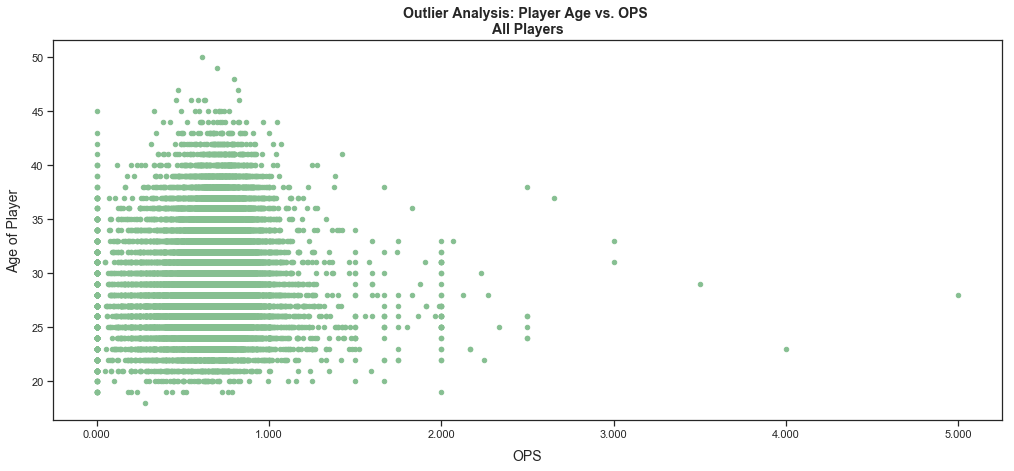

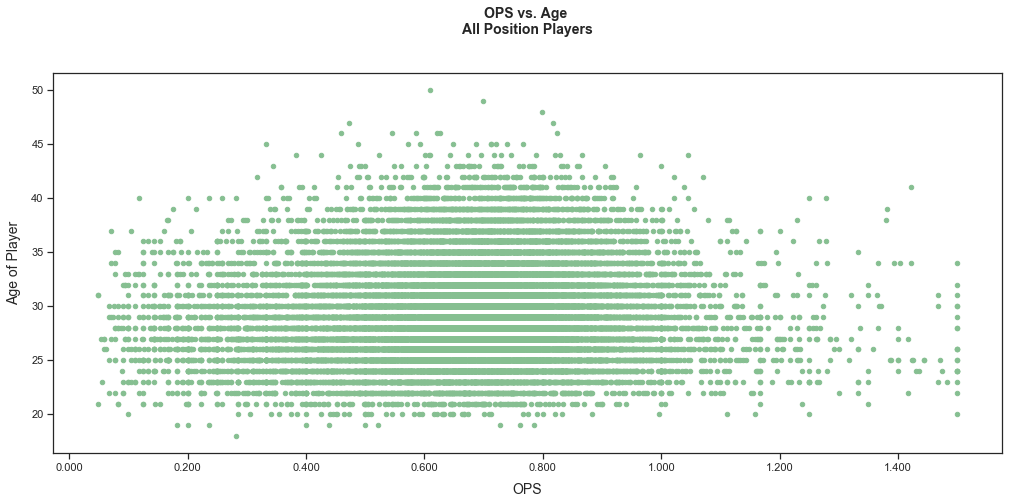

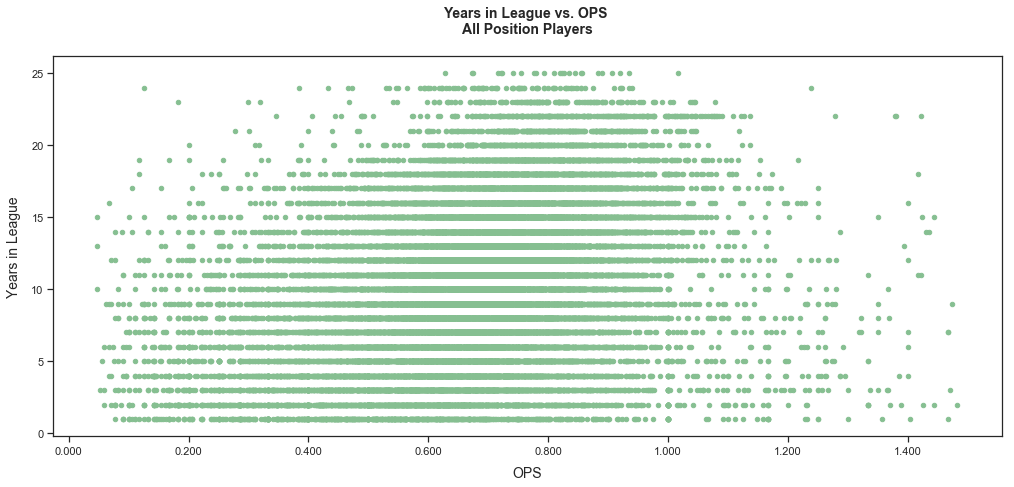

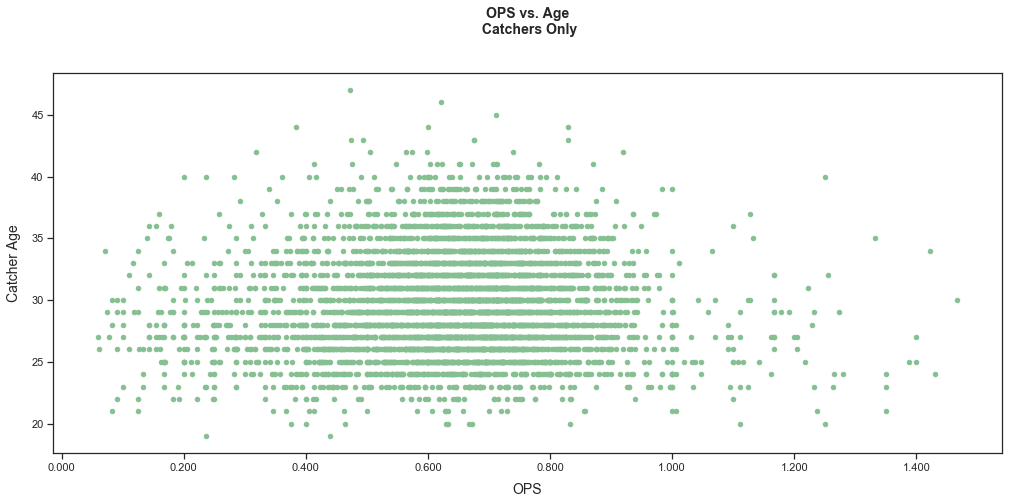

In [11]:
#
####################################################################################################################
#
#  Scatter plots looking for trend between OPS and age as well as years played
#
####################################################################################################################
#
# Scatter plot looking for outliers OPS vs Age all players
dfplot = df[['OPS','age']]
ax = dfplot.plot(kind='scatter', x='OPS',y='age',figsize=(FSHZ,7),color='#86bf91')
ax.set_title('Outlier Analysis: Player Age vs. OPS \nAll Players', weight='bold', size=14)
ax.set_xlabel("OPS", labelpad=10, size=14)
ax.set_ylabel("Age of Player", labelpad=10, size=14)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
plt.show()

# Scatter plot for players playing for 12 or more years with at least 300 avg atbats by OPS vs Age
dfplot = df[ (df['OPS'] > .0) & (df['OPS'] <= 1.5)][['OPS','age']]
ax = dfplot.plot(kind='scatter', x='OPS',y='age',figsize=(FSHZ,7),color='#86bf91')
ax.set_title('OPS vs. Age \nAll Position Players\n\n', weight='bold', size=14)
ax.set_xlabel("OPS", labelpad=10, size=14)
ax.set_ylabel("Age of Player", labelpad=10, size=14)
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()

# Scatter plot for all players OPS vs Years Played
dfplot = df[(df['OPS'] < 1.5) & (df['OPS'] > 0)][['OPS','years_played']]
ax = dfplot.plot(kind='scatter', x='OPS',y='years_played',figsize=(FSHZ,7),color='#86bf91')
ax.set_title('Years in League vs. OPS \nAll Position Players\n', weight='bold', size=14)
ax.set_xlabel("OPS", labelpad=10, size=14)
ax.set_ylabel("Years in League", labelpad=10, size=14)
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()
print('\n\n')

# Scatter plot for catchers only by OPS vs Age
dfplot = df[df['POS'] == 'C']
dfplot = dfplot[(dfplot['OPS'] < 1.5) & (dfplot['OPS'] > .0)][['OPS','age']]
ax = dfplot.plot(kind='scatter', x='OPS',y='age',figsize=(FSHZ,7),color='#86bf91')
ax.set_title('OPS vs. Age\n Catchers Only\n\n',weight='bold', size=14)
ax.set_xlabel("OPS", labelpad=10, size=14)
ax.set_ylabel("Catcher Age", labelpad=10, size=14)
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()

The first scatter plot showed outliers which need to be dealt with.  So the folloing OPS vs. Age slides only looked at OPS values of 1.500 or less.  The second scatter plot entitled "OPS vs. Age All Position Players" shows there seems to be a trend starting in a players late 20's or early 30's where their OPS performance starts to decline.  For OPS vs. Years Played, no trend was recognizable.  The last visual was for catchers only.  I am a big fan of Yadier Molina and was interested to see the scatter plot for just catchers.  Yadi is currently 37 years old and looking at the trend, shows his batting performance decline to be likely to continue in the coming couple of years.

The next set of visuals show trends over time ploting summary information by position (1B, 2B, 3B, SS, OF and C).  The meaning of each are as follows:

                         1B - first baseman
                         2B - second baseman
                         3B - third baseman
                         SS - short stop
                         OF - outfielder playing left, center or right field
                          C - catcher

Players can play multiple positions, so, I took the position where the player had the most at bats over their career and defined it to be their primary position which is represented by position in the project.  Also, I rolled up the 1B, 2B, 3B and SS to infielders and called the result position categories as follows:

                          Infielder  - 1B, 2B, 3B and SS
                          Outfielder - outfielder playing left, center or right field
                          Catcher    - C
                                            
Here are the results.

                    
                                             

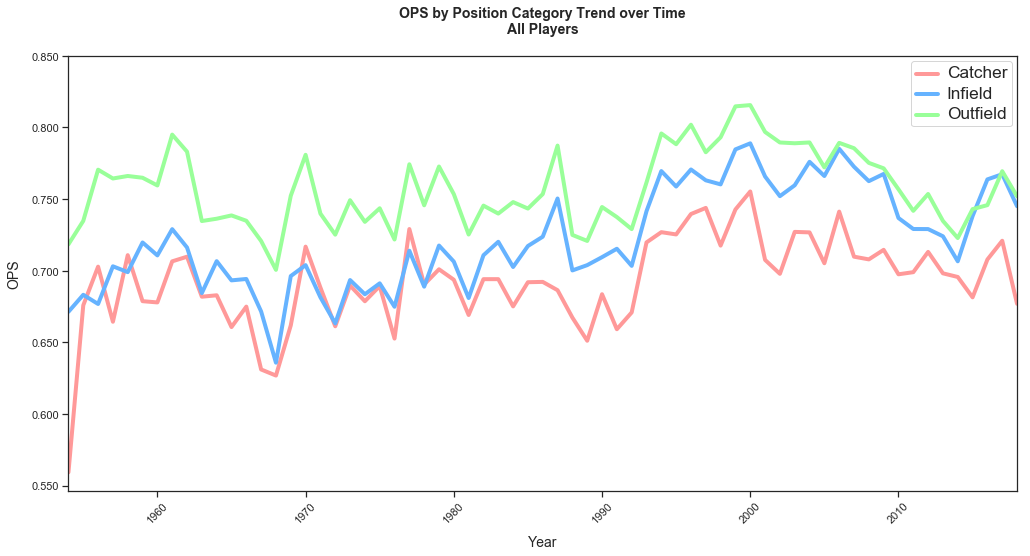

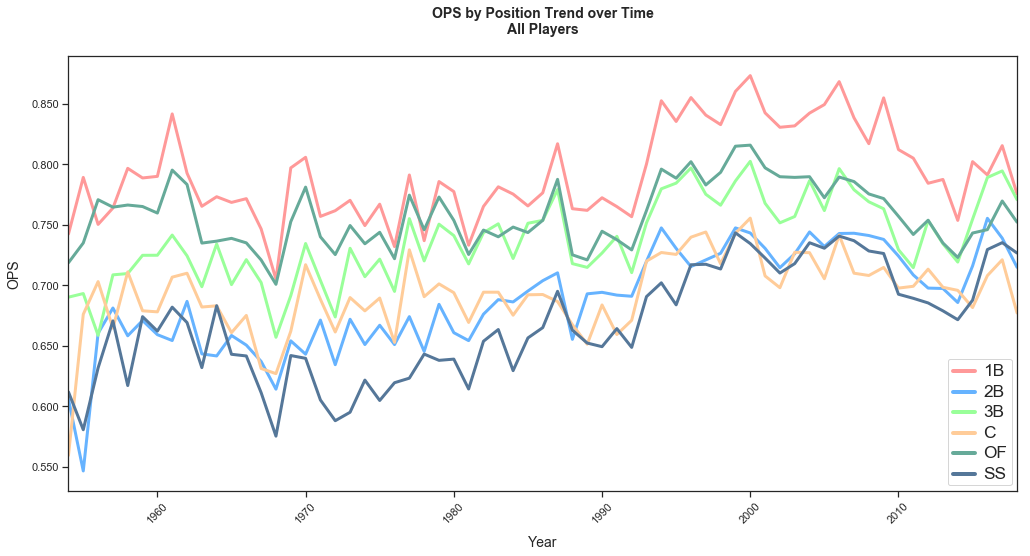

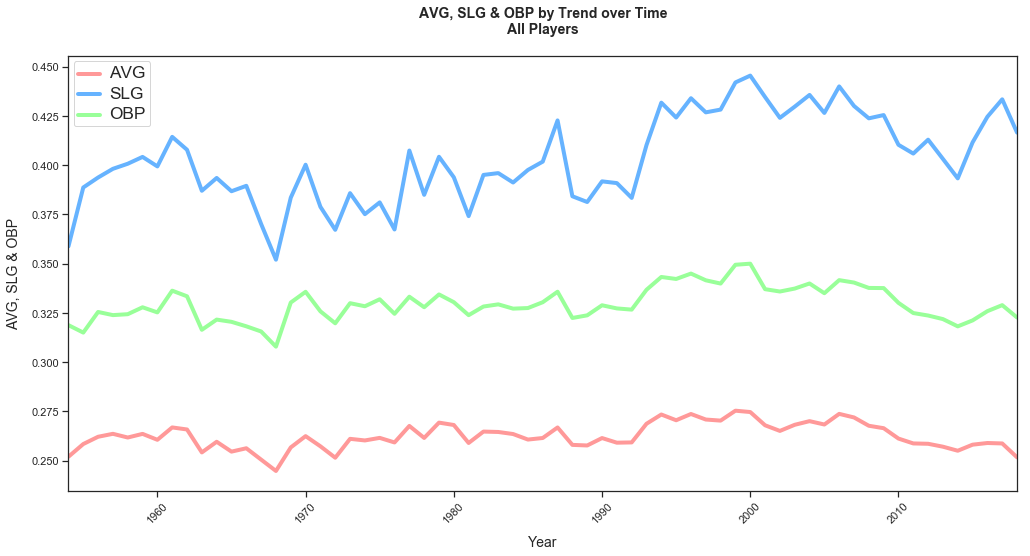

In [12]:

#
####################################################################################################################
#
# Line plots looking at OPS, AVG, SLG and OBP summarized by Position and Position Category over Time
#
####################################################################################################################
#
# plot players by Position Category against OPS for all players
dfplot = df[['yearID','POS_Cat','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['yearID','POS_Cat']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS_Cat = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='yearID',figsize=(FSHZ,8),linewidth=4,color=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('OPS by Position Category Trend over Time\nAll Players\n',weight='bold', size=14)
ax.set_xlabel("Year", labelpad=10, size=14)
ax.set_ylabel("OPS", labelpad=10, size=14)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.yticks(np.arange(.550,.900,.050))
plt.xticks(rotation=45)
plt.show()

# plot players by Position against OPS for all players
dfplot = df[['yearID','POS','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['yearID','POS']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='yearID',figsize=(FSHZ,8),linewidth=3,color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#66aa99','#557799'])
ax.set_title('OPS by Position Trend over Time\nAll Players\n',weight='bold', size=14)
ax.set_xlabel("Year", labelpad=10, size=14)
ax.set_ylabel("OPS", labelpad=10, size=14)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.yticks(np.arange(.550,.900,.050))
plt.xticks(rotation=45)
plt.show()

# plot players against AVG, SLG and OBP by Position Category for all players
dfplot = df[['yearID','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['yearID']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['AVG','SLG','OBP']]
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='yearID',figsize=(FSHZ,8),linewidth=4,color=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('AVG, SLG & OBP by Trend over Time\nAll Players\n',weight='bold', size=14)
ax.set_xlabel("Year", labelpad=10, size=14)
ax.set_ylabel("AVG, SLG & OBP", labelpad=10, size=14)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.xticks(rotation=45)
plt.show()

What is interesting about the above line charts is that it kind of answers one of my questions that I had.  Did position players have a hitter's advantage using steroids?  What I can say is that there is a trend that looks to support this.  Looking at between about 1993 and 2003, there is a clear trend upwards in OPS.  After 2003, when steroid testing began the trend seems to be retreating.  Does this mean steroids is the root cause...NO!  What it means is that there seems to be a correlation between the steroid era and an increase in OPS for position players collectively.  I also wondered which component of OPS (SLG and OBP) was causing the upward trend.  So I charted these as well as AVG (batting average).  SLG (slugging) seemed to have a bigger play in the increase in OPS during this time.  That is, the players were hitting more doubles, triples and home runs than in previous times.  Care needs to be taken with this conclusion because SLG is on a higher scale than OBP.  That's one of the issues with OPS: SLG is on a scale of .000 to 4.000 and OBP is on a scale of .000 to 1.000.

The final set of charts seeks to answer my other question.  Is there a general trend similar to the trend seen by the superstars which were charted above (OPS vs. Age).  Observed above was that of the superstars charted above, the minimum years played once their contract was satisfied was 12 years.  So, I looked at all position players since 1954 who have played at least 12 years in major league baseball.  Below are the results by position player and position category.




Total number of players playing at least 12 years (1954 to 2018): 892



Total number of player statistics by year for players playing at least 12 years (1954 to 2018): 13176





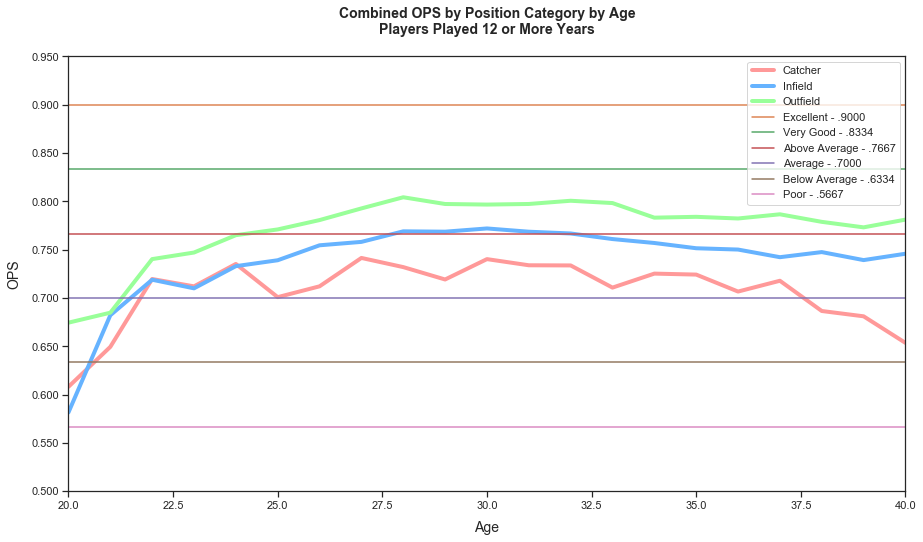

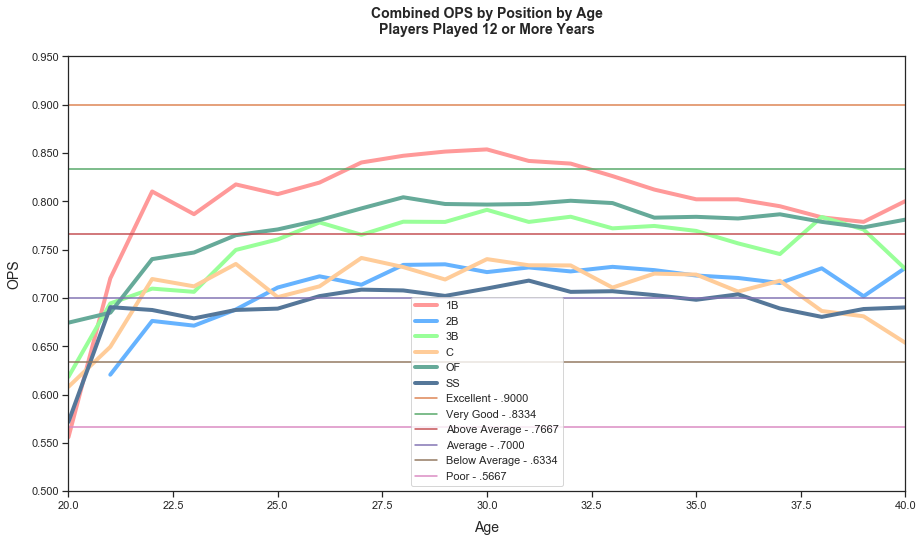

In [13]:
#
####################################################################################################################
#
# Line plots looking at OPS, AVG, SLG and OBP summarized by Position and Position Category compared against Age
#
####################################################################################################################
#
# print player population # of observations of players who have played more than 12 years
df12 = df[df['years_played'] >= 12]
print('\n\n')
print('Total number of players playing at least 12 years (1954 to 2018): ' + str(len(df12.playerID.drop_duplicates())))
print('\n\n')
print('Total number of player statistics by year for players playing at least 12 years (1954 to 2018): ' + str(len(df12)))
print('\n\n')

# plot players played 12 or more years against OPS by Position Category
dfplot = df[(df['years_played'] >= 12) & (df['age'] <= 40) & (df['age'] >= 20)][['age','POS_Cat','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['age','POS_Cat']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='age',figsize=(15,8),linewidth=4,color=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('Combined OPS by Position Category by Age\nPlayers Played 12 or More Years\n',weight='bold', size=14)
ax.set_xlabel("Age", labelpad=10, size=14)
ax.set_ylabel("OPS", labelpad=10, size=14)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large') 
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.yticks(np.arange(.500,1.000,.050))
plb.axhline(.9000,c='C1',label='Excellent - .9000', color='#ff9999')
plb.axhline(.8334,c='C2',label='Very Good - .8334', color='#66b3ff')
plb.axhline(.7667,c='C3',label='Above Average - .7667', color='#99ff99')
plb.axhline(.7000,c='C4',label='Average - .7000', color='#ffcc99')
plb.axhline(.6334,c='C5',label='Below Average - .6334', color='#66aa99')
plb.axhline(.5667,c='C6',label='Poor - .5667', color='#557799')
leg = plt.legend()
plt.show()

# plot players played 12 or more years against OPS by Position
dfplot = df[(df['years_played'] >= 12) & (df['age'] <= 40) & (df['age'] >= 20)][['age','POS','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['age','POS']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='age',figsize=(15,8),linewidth=4,color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#66aa99','#557799'])
ax.set_title('Combined OPS by Position by Age\nPlayers Played 12 or More Years\n',weight='bold', size=14)
ax.set_xlabel("Age", labelpad=10, size=14)
ax.set_ylabel("OPS", labelpad=10, size=14)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.yticks(np.arange(.500,1.000,.050))
plb.axhline(.9000,c='C1',label='Excellent - .9000', color='#ff9999')
plb.axhline(.8334,c='C2',label='Very Good - .8334', color='#66b3ff')
plb.axhline(.7667,c='C3',label='Above Average - .7667', color='#99ff99')
plb.axhline(.7000,c='C4',label='Average - .7000', color='#ffcc99')
plb.axhline(.6334,c='C5',label='Below Average - .6334', color='#66aa99')
plb.axhline(.5667,c='C6',label='Poor - .5667', color='#557799')
leg = plt.legend()
plt.show()



What the above two charts show is that there is a trend that starts around the age of 30 where OPS declines over time.  And for first basemen, the decline seems to be more severe.  This is not good news for Paul Goldschmidt, a first baseman, and the Cardinals as he is 32 years old.  I hope Paul bucks the trend!  Time will tell.  And at 37, Yadier Molina is amazing and a future hall of famer (I hope).  Yadi's OPS peaked in 2012 (.874) at the age of 32 as predicted by the above trend and has been in decline ever since, but what a career!